K-Nearest Neighbors (KNN) es un algoritmo de aprendizaje supervisado que se utiliza para la clasificación y la regresión. 

La idea básica detrás de KNN es simple:

# para hacer una predicción para un punto de datos dado, se encuentran los K vecinos más cercanos y se toma una decisión basada en la mayoría de las clases de estos vecinos.

En términos matemáticos, se puede describir el proceso de KNN como sigue:

Se mide la distancia entre el punto de datos a predecir y cada uno de los puntos de datos en el conjunto de entrenamiento.

Se ordenan los puntos de entrenamiento por la distancia a la punto de datos a predecir y se seleccionan los K vecinos más cercanos.

Se asigna una clase a la punto de datos a predecir basada en la mayoría de las clases de los K vecinos más cercanos.

KNN es un algoritmo simple y fácil de implementar, pero puede ser computacionalmente costoso para conjuntos de datos grandes. 

# Además, es importante tener en cuenta que KNN no crea un modelo explícito, sino que simplemente almacena los datos de entrenamiento y hace una búsqueda en tiempo real para hacer predicciones.

En términos de elección entre KNN y otros algoritmos, como Naive Bayes o SVM, es importante tener en cuenta que 

# KNN es un algoritmo no paramétrico, lo que significa que no hace ninguna suposición sobre la forma de los datos. 

Esto lo hace una buena opción para problemas con datos complejos o relaciones no lineales. Sin embargo, es importante tener en cuenta que KNN puede ser más lento que otros algoritmos para conjuntos de datos grandes, y puede ser más propenso a la sobreajuste si se eligen valores de K muy pequeños.

En resumen, KNN es una buena opción para problemas de clasificación y regresión en los que los datos son complejos o tienen relaciones no lineales. Es un algoritmo simple y fácil de implementar, pero puede ser más lento que otros algoritmos para conjuntos de datos grandes.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo KNN con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluar la precisión del modelo en el conjunto de prueba
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


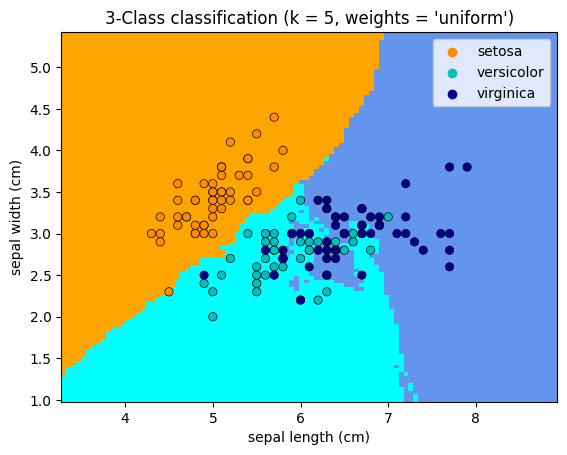

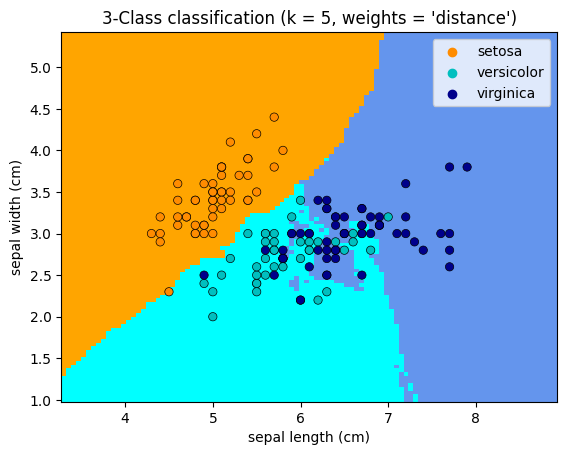

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = knn#neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()